# Data Analyst Case do Ifood

https://github.com/ifood/ifood-data-analyst-case

Queremos entender:

* que tipo de usuário aceita "na primeira", segunda, terceira oferta, etc.
* tratar as informações e tirar insights

Segundo passo (preditivo)
* se formos mandar uma nova campanha, para qual público seria melhor enviarmos? 
* mais adiante queremos saber qual é o melhor grupo para enviar uma campanha

https://www.yumpu.com/en/document/read/65548120/ifood-data-analyst-case


## Do PDF, temos:


1. Qtdade de clientes: "de 100 a 900 mil usuários registrados".
2. Atendem aprox 1 milhão de usuários por ano.
3. Produtos em 5 principais categorias (sendo separados posteriormente em 'gold and regular products'): 
    * 'wines, 
    * rare meat products, 
    * exotic fruits, 
    * specially prepared fish and 
    * sweet products '
4. Canais de compra: 3 sales channels: physical stores, catalogs and the company’s website.
5. Contexto do problema:
    * "Globally, the company had solid revenues and a healthy bottom line in the past 3 years, but 
        * the profit growth perspectives for the next 3 years are not promising... 
        For this reason, several strategic initiatives are being considered to invert this situation. 
            * One is to **improve the performance of marketing activities**, with a special focus on marketing campaigns."

**OBJETIVO:**
* Criar uma análise para retornar o melhor lucro, na campanha do próximo mês. 
* Campanha piloto (oferece a venda de um gadget para compra):
    * 2240 customers
    * valor total da campanha: 6720MU
    * receita gerada pelos clientes que aceitaram a oferta: 3674MU
    * lucro líquido = -3046MU
    * taxa de sucesso: 15%


# Código

In [101]:
import numpy as np 
import seaborn as sns
import pandas as pd
from datetime import datetime
pd.options.display.max_rows=100
pd.options.display.max_columns=100

In [59]:
df = pd.read_csv('/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/data/raw/retail_case_data.csv')

## Explorando df

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Procurando por nulos

In [61]:
df.isnull().sum().sort_values(ascending=False)
#temos 24 elementos nulos em 'Income'

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [62]:
24/2240*100

1.0714285714285714

Para nosso estudo, iremos eliminar os elementos nulos, porque representa apenas 1.07% das observações:
Primeiro precisamos transformar os nulos em "Nan":

In [63]:
#Eliminamos as linhas que contém algum elemento nulo:
df.dropna(inplace=True)

In [64]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [65]:
print('Mínimo: ', df['Income'].min())
print('Média: ', df['Income'].mean())
print('Máximo: ', df['Income'].max())

Mínimo:  1730.0
Média:  52247.25135379061
Máximo:  666666.0


Plotando boxplot para 'Income'

<AxesSubplot:xlabel='Income'>

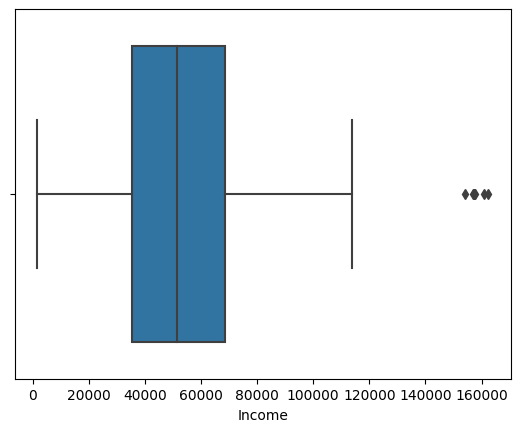

In [74]:

ax = sns.boxplot(x = 'Income', data = df)
ax

In [73]:
df.sort_values('Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
617,1503,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975,10311,1969,Graduation,Married,4428.0,0,1,2013-10-05,0,16,4,12,2,4,321,0,25,0,0,1,0,0,0,0,0,0,3,11,0
1846,9931,1963,PhD,Married,4023.0,1,1,2014-06-23,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,3,11,0
1524,11110,1973,Graduation,Single,3502.0,1,0,2013-04-13,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,3,11,0
21,5376,1979,Graduation,Married,2447.0,1,0,2013-01-06,42,1,1,1725,1,1,1,15,0,28,0,1,0,0,0,0,0,0,3,11,0


In [68]:
# Iremos eliminar a observação com o outlier de salário "exorbitante"

In [72]:
#removido diretamente através do índice:
df.drop(2233, inplace=True)

In [75]:
df.head(20).sort_values('Income', ascending=False)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
15,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
18,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
12,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,2,53,3,5,14,3,6,1,5,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0


### Criando coluna de renda mensal: 'IncomeMonth'

In [23]:
df['IncomeMonth']=df['Income']/12

In [9]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Adicionando colunas extras

## TotAcceptedCmp

In [76]:
# total campanhas aceitas: TotAcceptedCmp
df['TotAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,TotAcceptedCmp
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,0


## Age

Considerando a data mais recente do registro do cliente no sistema como a data de quando df foi gerado, iremos estimar a idade do cliente:

In [83]:
df['Dt_Customer'].max()

'2014-06-29'

In [85]:
df['Age'] = 2014 - df['Year_Birth']

In [88]:
df.drop(columns=['Year_Birth'], inplace=True)

## Days_Registered

In [103]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%Y-%m-%d")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2215 non-null   int64         
 1   Education            2215 non-null   object        
 2   Marital_Status       2215 non-null   object        
 3   Income               2215 non-null   float64       
 4   Kidhome              2215 non-null   int64         
 5   Teenhome             2215 non-null   int64         
 6   Dt_Customer          2215 non-null   datetime64[ns]
 7   Recency              2215 non-null   int64         
 8   MntWines             2215 non-null   int64         
 9   MntFruits            2215 non-null   int64         
 10  MntMeatProducts      2215 non-null   int64         
 11  MntFishProducts      2215 non-null   int64         
 12  MntSweetProducts     2215 non-null   int64         
 13  MntGoldProds         2215 non-nul

In [105]:
df["Days_Registered"] = (df["Dt_Customer"].max() - df["Dt_Customer"]).dt.days

# Eliminando colunas com valores constantes

In [108]:
df["Z_Revenue"].value_counts()

11    2215
Name: Z_Revenue, dtype: int64

In [109]:
df["Z_CostContact"].value_counts()

3    2215
Name: Z_CostContact, dtype: int64

In [110]:
df.drop(columns=["Z_Revenue", "Z_CostContact"], inplace=True)

In [113]:
df.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'TotAcceptedCmp', 'Age', 'Days_Registered'],
      dtype='object')

# Correlação

In [107]:
# As pessoas que compram mais vinhos são as que tem o maior poder aquisitivo?
df[['MntWines', 'Income', 'MntGoldProds']].corr()

,MntWines,Income,MntGoldProds
MntWines,1.000000,0.688269,0.392588
Income,0.688269,1.000000,0.389204
MntGoldProds,0.392588,0.389204,1.000000


In [123]:
df.corr()['Response'].sort_values()

Recency               -0.199981
Teenhome              -0.154114
Kidhome               -0.077733
Age                   -0.023825
ID                    -0.021273
NumWebVisitsMonth     -0.002156
Complain              -0.002048
NumDealsPurchases      0.003617
NumStorePurchases      0.036085
MntFishProducts        0.108054
MntSweetProducts       0.116065
MntFruits              0.122391
MntGoldProds           0.140232
NumWebPurchases        0.151367
Income                 0.161049
AcceptedCmp2           0.169279
AcceptedCmp4           0.180162
Days_Registered        0.196525
NumCatalogPurchases    0.219830
MntMeatProducts        0.237653
MntWines               0.246185
AcceptedCmp3           0.253966
AcceptedCmp1           0.297312
AcceptedCmp5           0.323339
TotAcceptedCmp         0.427076
Response               1.000000
Name: Response, dtype: float64

In [117]:
df[['AcceptedCmp1', 
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4', 
    'AcceptedCmp5',
    'Response']].corr()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
AcceptedCmp1,1.000000,0.176627,0.095653,0.242757,0.407858,0.297312
AcceptedCmp2,0.176627,1.000000,0.071689,0.295041,0.222111,0.169279
AcceptedCmp3,0.095653,0.071689,1.000000,-0.079697,0.080215,0.253966
AcceptedCmp4,0.242757,0.295041,-0.079697,1.000000,0.311290,0.180162
AcceptedCmp5,0.407858,0.222111,0.080215,0.311290,1.000000,0.323339
Response,0.297312,0.169279,0.253966,0.180162,0.323339,1.000000


Aqui confirmamos a taxa de sucesso da campanha: 15%.
Queremos explicar por que esse resultado.

In [119]:
df['Response'].value_counts(normalize=True)

0    0.849661
1    0.150339
Name: Response, dtype: float64

# Plotando Regressão

<AxesSubplot:xlabel='MntWines', ylabel='Response'>

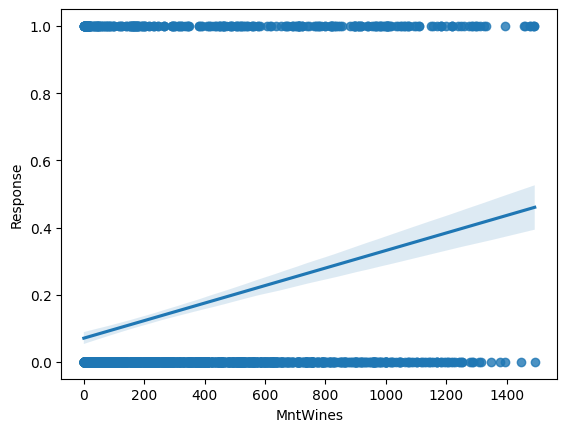

In [124]:
sns.regplot(x = 'MntWines', y = 'Response', data = df)

# Modelo: Regressão Linear

In [126]:
#importamos a classe "LinearRegression" 
from sklearn.linear_model import LinearRegression 

Não foi possível encontrar correlações muito altas entre as variáveis. Por isso iremos utilizar uma regressão linear com múltiplas variáveis.

In [127]:
#vamos procurar a melhor equação que explique o preço.
#iremos utilizar uma regrssão linear com múltiplas variáveis.
lr = LinearRegression()

In [128]:
#aqui filtramos as correlações que são maiores que .15
df.corr()['Response'][(df.corr()['Response'] > .15) | (df.corr()['Response'] < -.15)].sort_values(ascending = False)

Response               1.000000
TotAcceptedCmp         0.427076
AcceptedCmp5           0.323339
AcceptedCmp1           0.297312
AcceptedCmp3           0.253966
MntWines               0.246185
MntMeatProducts        0.237653
NumCatalogPurchases    0.219830
Days_Registered        0.196525
AcceptedCmp4           0.180162
AcceptedCmp2           0.169279
Income                 0.161049
NumWebPurchases        0.151367
Teenhome              -0.154114
Recency               -0.199981
Name: Response, dtype: float64

<AxesSubplot:>

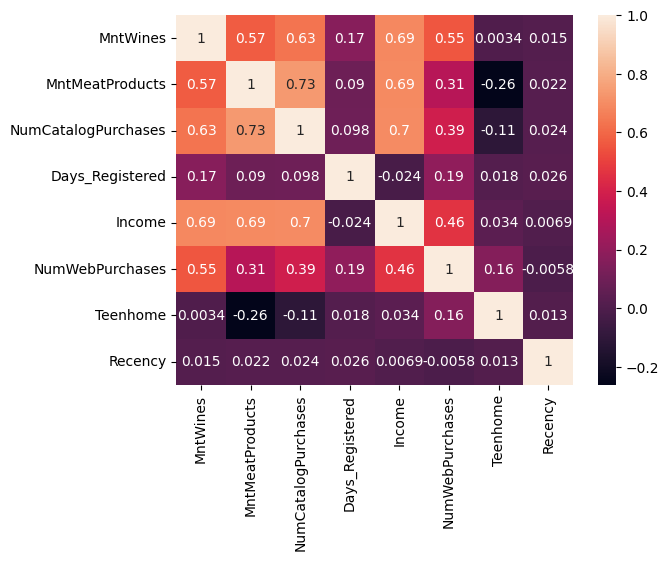

In [148]:
# Gerando grafico de correlação:
df[['MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Days_Registered', 'Income', 'NumWebPurchases', 'Teenhome', 'Recency']].corr()

#Podemos gerar um mapa de calor com o Seaborn
sns.heatmap(df[['MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Days_Registered', 'Income', 'NumWebPurchases', 'Teenhome', 'Recency']].corr(), annot = True)



In [129]:
X = df[['MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Days_Registered', 'Income', 'NumWebPurchases', 'Teenhome', 'Recency']]
Y = df['Response']

In [130]:
lr.fit(X, Y)

LinearRegression()

In [133]:
lr.coef_

array([ 1.66039366e-04,  1.53470936e-04,  6.10308163e-03,  2.78371075e-04,
       -8.58378313e-07,  3.69546511e-03, -8.32357083e-02, -2.56356622e-03])

In [134]:
lr.intercept_

0.15658426034220618

# VALIDANDO RESULTADOS: train_test_split


In [135]:
#vamos separar a base de treino em treino e validação. Depois testamos os resultados com a base de testes (dadosTeste)
from sklearn.model_selection import train_test_split

In [136]:
#separamos a base em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #holdout

In [137]:
#rodamos mais uma vez o fit
lr.fit(x_train, y_train)

LinearRegression()

In [138]:
#obtemos o novo intercept e coeficiente:
lr.intercept_

0.13444985780959307

In [139]:
lr.coef_

array([ 1.73066376e-04,  1.43472869e-04,  1.27024585e-02,  3.36827653e-04,
       -8.42066697e-07, -2.52791976e-03, -7.82067474e-02, -2.51393565e-03])

In [140]:
#yHat recebe a previsão usando x_test
yHat = lr.predict(x_test)

#### Agora rodamos as métricas:

In [141]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [143]:
r2 = r2_score(y_test, yHat)
print('R2 Score: ', r2)

mae = mean_absolute_error(y_test, yHat)
print('MAE: ', mae)

mse = mean_squared_error(y_test, yHat)
print('MSE: ', mse)

R2 Score:  0.09411734189837662
MAE:  0.24458004674025766
MSE:  0.12044977171434325


## Matplotlib
valor real : y_test
valor predito: yhat

In [144]:
import matplotlib.pyplot as plt

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


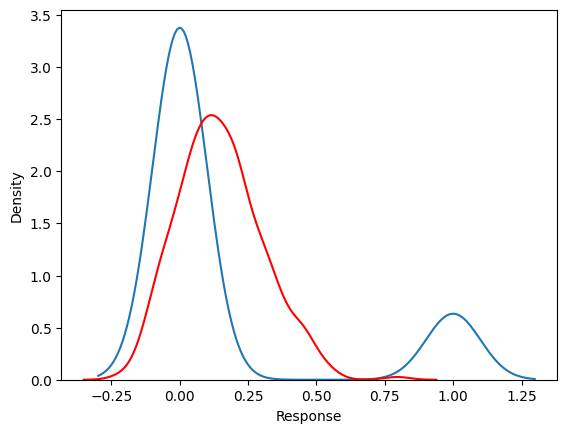

In [145]:
ax = sns.distplot(y_test, hist=False, label='Valor atual' )
sns.distplot(yHat, color='r', hist=False, label='Valor atual' )
plt.show()
# assim podemos ver o quanto nossos valores estão próximos do valor real. 

/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


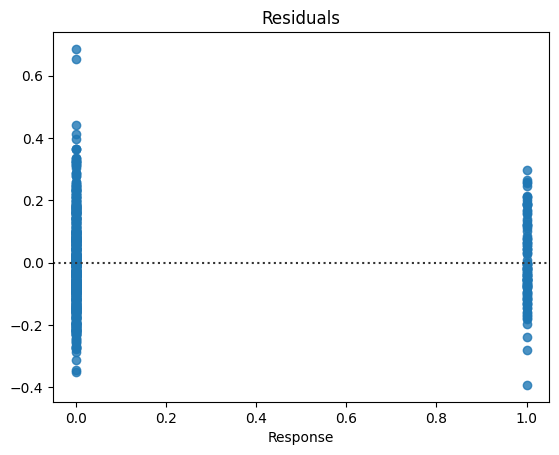

In [146]:
sns.residplot(y_test, yHat)
plt.title('Residuals')
plt.show()

# Usando regressão polinomial + Pipeline:

In [151]:
from sklearn.preprocessing import PolynomialFeatures


In [152]:
def aplica_polynomial(x_train, x_test, grau=2):
  pf = PolynomialFeatures(degree=grau)
  x_train_pf = pf.fit_transform(x_train)
  x_test = pf.transform(x_test)
  return x_train_pf, x_test

def aplica_modelo(x_train, y_train, x_test):
  lr = LinearRegression()
  lr.fit(x_train, y_train)
  yhat = lr.predict(x_test)
  print('Treino: ', lr.score(x_train, y_train))
  return yhat
  
def evaluate_model(yHat, y_test):
  r2 = r2_score(y_test, yHat)
  print('R2 Score: ', r2)

  mae = mean_absolute_error(y_test, yHat)
  print('MAE: ', mae)

  mse = mean_squared_error(y_test, yHat)
  print('MSE: ', mse)

  sns.residplot(y_test, yHat)
  plt.title('Residuals')
  plt.show()


def Pipeline_Regressao(X, Y, grau=2):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42 )
  x_train_pf, x_test_pf = aplica_polynomial(x_train, x_test, grau)
  yHat = aplica_modelo(x_train_pf, y_train, x_test_pf)
  print('Resultados Polinomial Grau:', grau)
  print('\nResultado Conjunto de Teste:')
  evaluate_model(yHat, y_test)
  print('---------------------------\n')

Treino:  0.18465982712770035
Resultados Polinomial Grau: 1

Resultado Conjunto de Teste:
R2 Score:  0.09411734189837695
MAE:  0.24458004674025768
MSE:  0.1204497717143432


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


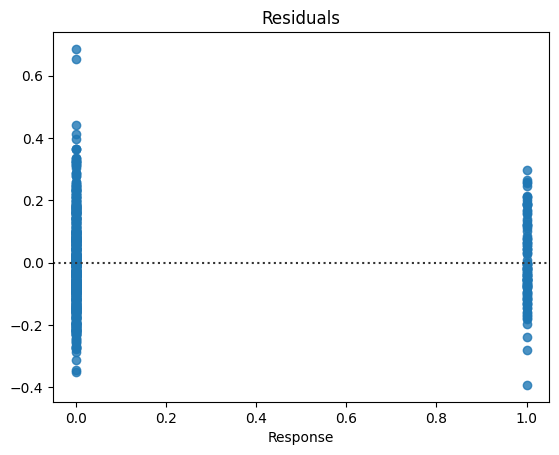

---------------------------

Treino:  0.2843959130134692
Resultados Polinomial Grau: 2

Resultado Conjunto de Teste:
R2 Score:  0.04467646717325713
MAE:  0.22670522618672076
MSE:  0.12702362763347272


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


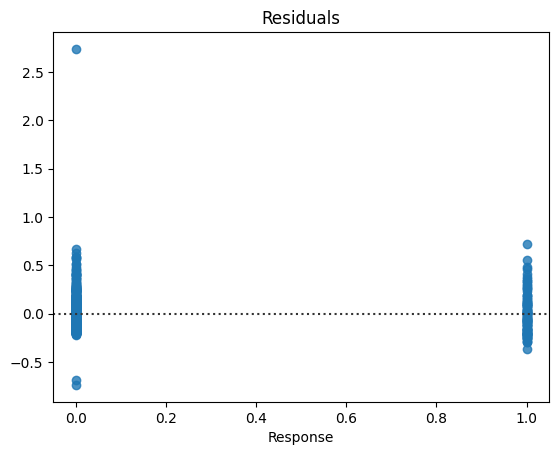

---------------------------

Treino:  0.39905267650171994
Resultados Polinomial Grau: 3

Resultado Conjunto de Teste:
R2 Score:  -0.3563918816373428
MAE:  0.2378591052292666
MSE:  0.1803512751207547


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


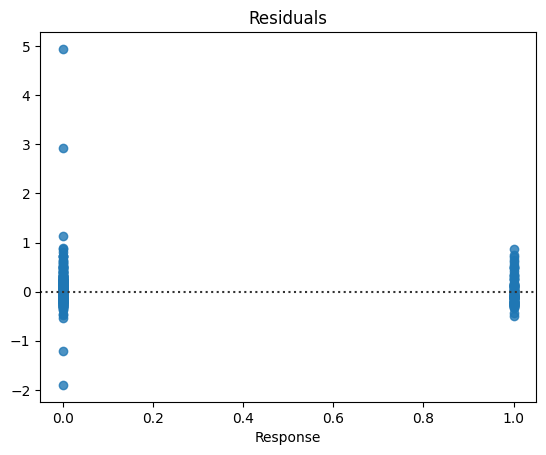

---------------------------

Treino:  0.17075729882609447
Resultados Polinomial Grau: 4

Resultado Conjunto de Teste:
R2 Score:  -291.8424521142984
MAE:  0.6553178706654984
MSE:  38.93750055813385


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


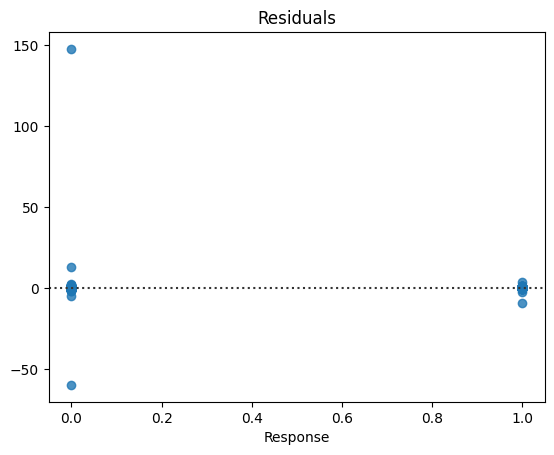

---------------------------

Treino:  0.5475958738908568
Resultados Polinomial Grau: 5

Resultado Conjunto de Teste:
R2 Score:  -5921.75644443984
MAE:  1.4787008633747531
MSE:  787.5133222523885


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


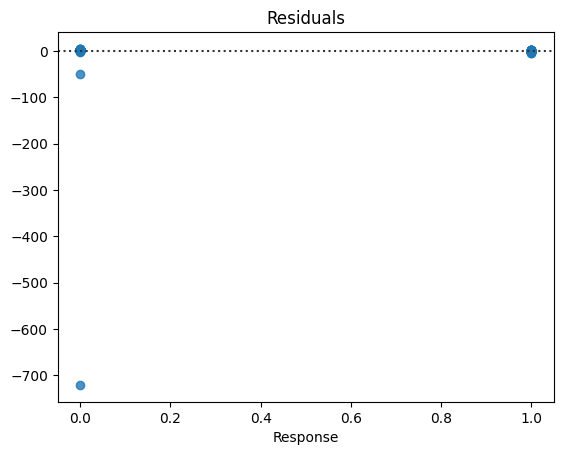

---------------------------

Treino:  0.5038858114549868
Resultados Polinomial Grau: 6

Resultado Conjunto de Teste:
R2 Score:  -1314.5326320759912
MAE:  1.026576703426192
MSE:  174.9184663148132


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


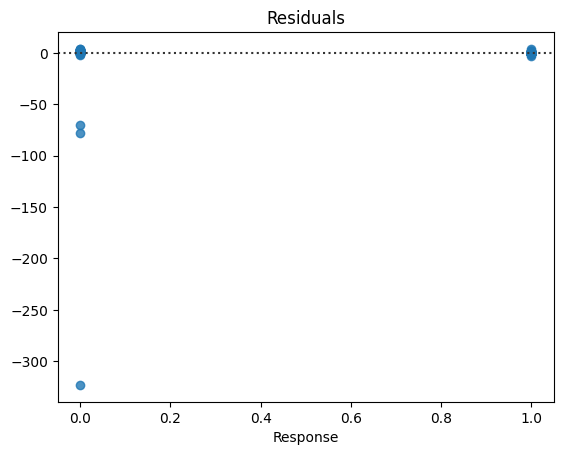

---------------------------

Treino:  0.4768927629029611
Resultados Polinomial Grau: 7

Resultado Conjunto de Teste:
R2 Score:  -6248.409312268426
MAE:  1.6596023043958417
MSE:  830.9463905509264


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


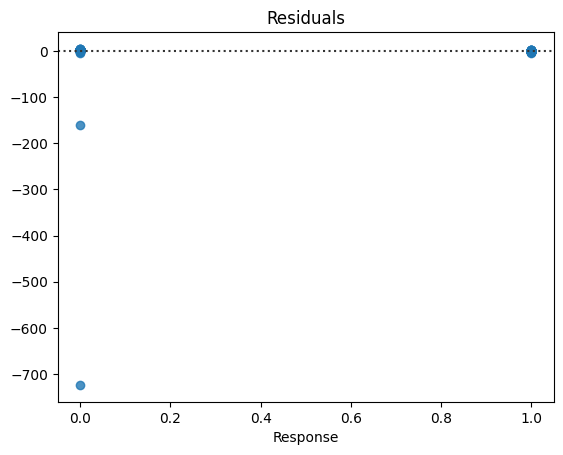

---------------------------

Treino:  0.4505289433049626
Resultados Polinomial Grau: 8

Resultado Conjunto de Teste:
R2 Score:  -18074.28140588221
MAE:  2.6099467092270725
MSE:  2403.3615165715955


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


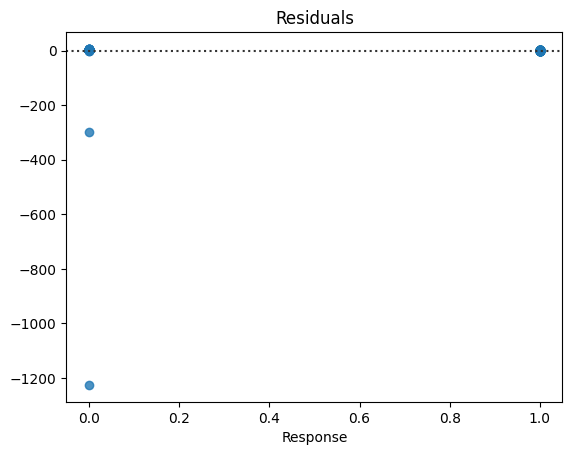

---------------------------

Treino:  0.42402021688543456
Resultados Polinomial Grau: 9

Resultado Conjunto de Teste:
R2 Score:  -24975.444351087637
MAE:  3.3201837590486334
MSE:  3320.96766995071


/Users/ferkrum/projects-python/awari/git/ifood-data-analyst-case/.ifood-data-analyst-case/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


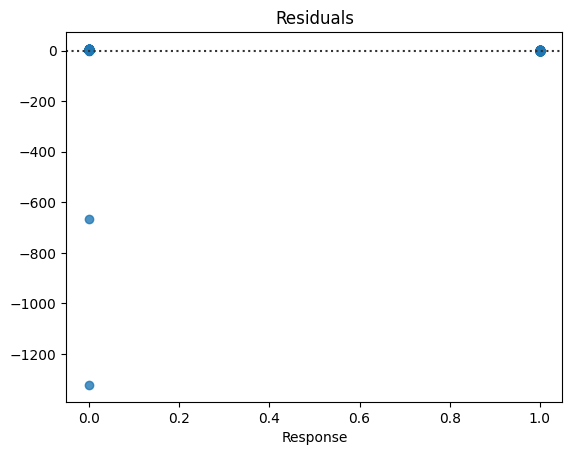

---------------------------



KeyboardInterrupt: 

In [154]:
X = df[['MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Days_Registered', 'Income', 'NumWebPurchases', 'Teenhome', 'Recency']]
Y = df['Response']

for i in range(1, 30):
  Pipeline_Regressao(X, Y, i)